<a href="https://colab.research.google.com/github/Munazza-Farees/edunet-virtual-internship/blob/main/Steganography_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Phase 1
!pip install opencv-python numpy matplotlib pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.8 MB/s eta 0:00:00


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [16]:
print(os.path.exists('/content/drive/MyDrive/CT_Medical_Images_Dataset/ID_0001_AGE_0069_CONTRAST_1_CT.png'))

True


Extracted message -> Patient ID: 8359304
PSNR: 87.79 dB


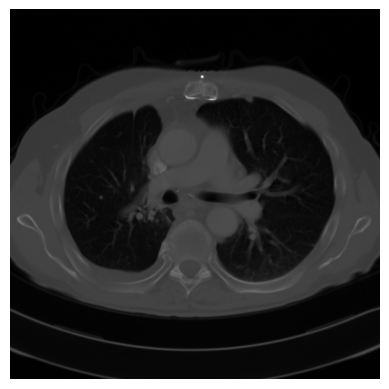

In [17]:

# Load image, embed, and evaluate
image_path = os.path.join('/content/drive/MyDrive/CT_Medical_Images_Dataset/ID_0001_AGE_0069_CONTRAST_1_CT.png')
cover = cv2.imread(image_path)
message = "Patient ID: 8359304"


def embed_lsb(image, message):
  if image is None:
    raise ValueError("Image is not loaded. Check the file path.")

  binary_msg = ''.join(format(ord(c), '08b') for c in message)

  img_flat = image.flatten()
  if len(binary_msg) > len(img_flat):
    raise ValueError("Message is too long to embed in the image.")

  for i in range(len(binary_msg)):
    img_flat[i] = (img_flat[i] & 0xFE) | int(binary_msg[i])
  return img_flat.reshape(image.shape)

def extract_lsb(image, msg_length):
  if image is None:
    raise ValueError("Image is not loaded. Check the file path.")

  img_flat = image.flatten()
  bits = [img_flat[i] & 1 for i in range(msg_length * 8)]
  return ''.join(chr(int(''.join(map(str, bits[i:i+8])), 2)) for i in range(0, len(bits), 8))

# Check if the image was loaded successfully
if cover is not None:
  try:
    stego = embed_lsb(cover, message)

    cv2.imwrite('stego.jpg', stego)
    extracted = extract_lsb(stego, len(message))

    psnr_value = psnr(cover, stego)

    print(f"Extracted message -> {extracted}")
    print(f"PSNR: {psnr_value:.2f} dB")
  except Exception as e:
    print(f"Error during processing: {e}")
else:
    print("Error: Image could not be loaded. Please check the file path.")

plt.imshow(cv2.cvtColor(cover, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

The key generated is dc5da61eb01b5b1432069dbe2373268d1692d8e7042573a5681bfbe255182c01
The original message is 'Patient ID: 8359304'
Encrypted message -> d1c67ad67e3d4fac5dff52fda8c240694069b8667590ea8b0662aa20d269e2b289d9b5f8ac36a20c5ef31b3f775eb927
Decrypted message -> Patient ID: 8359304


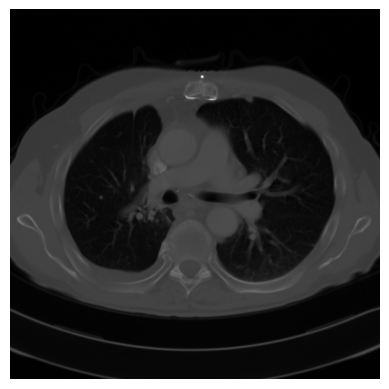

In [21]:
from Cryptodome.Cipher import AES
from Cryptodome.Random import get_random_bytes
from Cryptodome.Util.Padding import pad, unpad

def encrypt_message(message, key):
  cipher = AES.new(key, AES.MODE_CBC)
  ct_bytes = cipher.encrypt(pad(message.encode(), AES.block_size))
  return cipher.iv + ct_bytes

def decrypt_message(ciphertext, key):
  iv = ciphertext[:16]
  ct = ciphertext[16:]
  cipher = AES.new(key, AES.MODE_CBC, iv)
  return unpad(cipher.decrypt(ct), AES.block_size).decode()

key = get_random_bytes(32)
message = "Patient ID: 8359304"

print(f"The key generated is {key.hex()}")
print(f"The original message is '{message}'")

encrypted = encrypt_message(message, key)
print(f"Encrypted message -> {encrypted.hex()}")
stego = embed_lsb(cover, encrypted.hex())
cv2.imwrite('stego_encrypted.jpg', stego)
extracted = bytes.fromhex(extract_lsb(stego, len(encrypted.hex())))
decrypted = decrypt_message(extracted, key)
print(f"Decrypted message -> {decrypted}")

plt.imshow(cv2.cvtColor(cover, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()